# line plots
with Formula 1 data from https://ergast.com/mrd/db

In [1]:
%autosave 0

from tools import *

f1 = ErgastZIP(ERGAST_ZIP)
plot = Plot()

Autosave disabled


In [2]:
def id_race(year, name):
    """ int: id_race for given year and race name. """
    races = (
        f1.races
        .loc[lambda df: df['season'].eq(year)]
        .loc[lambda df: df['race'].eq(name)]
    )
    return races.index.values[0]
            
def lapgaps(id_race):
    """ DataFrame: Gap to leader on each lap of a race. """
    data = (
        f1.lap_times
        .loc[lambda df: df['id_race'].eq(id_race)]
        .join(f1.drivers['driver'], on='id_driver')
        .pivot(index='lap', columns='driver', values='seconds')
        .cumsum()
    )
    data = data.sub(data.min(axis=1), axis=0)
    cols = data.iloc[-1].sort_values().index
    return data[cols]

def showgaps(year, name, **color):
    """ None: Plot gap to leader on each lap for each driver. """
    gaps = lapgaps(id_race(year, name))
    kw = dict()
    kw['color'] = gaps.columns.map(color).fillna('black')
    kw['title'] = f"{year} {name}"
    kw['xlabel'] = 'lap number'
    kw['ylim'] = (65, -5)
    kw['ylabel'] = 'gap to leader (seconds)'
    return plot.line(gaps, **kw)

## under the rainbow

Save /context/data/plots/under_the_rainbow.png


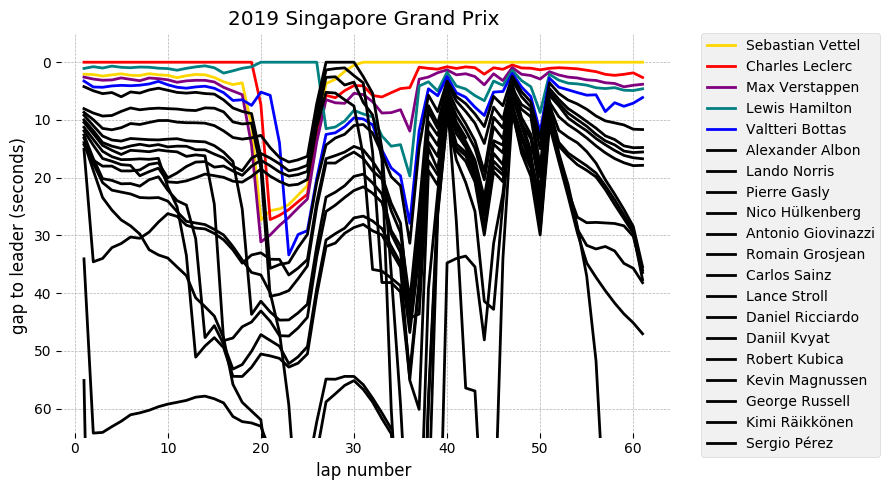

In [3]:
color = dict()
color['Lewis Hamilton'] = 'teal'
color['Sebastian Vettel'] = 'gold'
color['Charles Leclerc'] = 'red'
color['Max Verstappen'] = 'purple'
color['Valtteri Bottas'] = 'blue'
axes = showgaps(2019, 'Singapore Grand Prix', **color)
savepng(axes, 'under_the_rainbow')

## garde le pour toi

Save /context/data/plots/garde_le_pour_toi.png


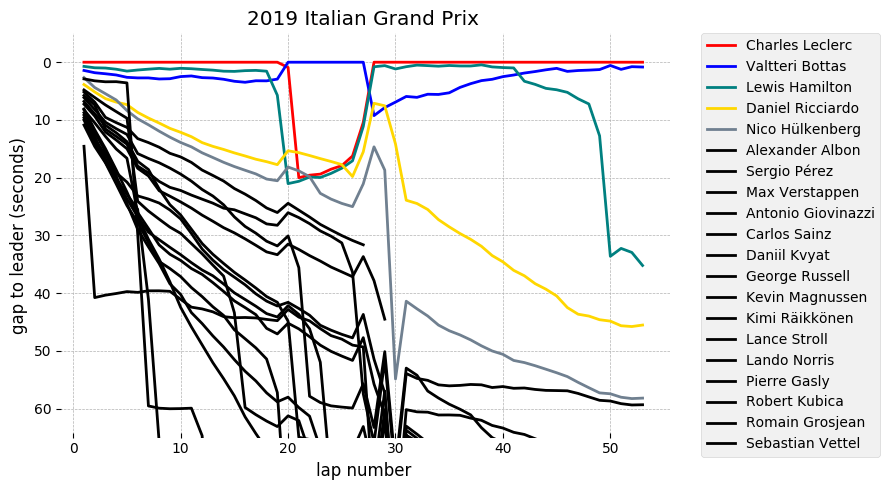

In [4]:
color = dict()
color['Charles Leclerc'] = 'red'
color['Valtteri Bottas'] = 'blue'
color['Lewis Hamilton'] = 'teal'
color['Daniel Ricciardo'] = 'gold'
color['Nico Hülkenberg'] = 'slategrey'
axes = showgaps(2019, 'Italian Grand Prix', **color)
savepng(axes, 'garde_le_pour_toi')

## maximum overdrive

Save /context/data/plots/maximum_overdrive.png


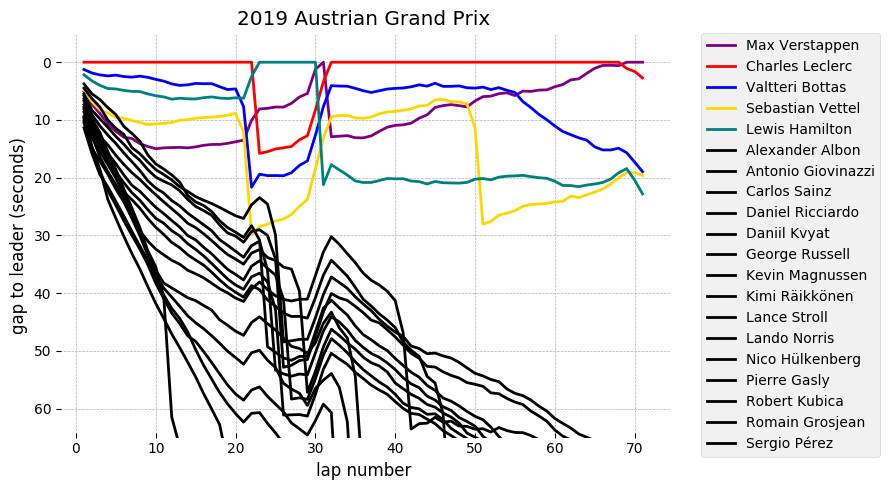

In [5]:
color = dict()
color['Lewis Hamilton'] = 'teal'
color['Valtteri Bottas'] = 'blue'
color['Sebastian Vettel'] = 'gold'
color['Charles Leclerc'] = 'red'
color['Max Verstappen'] = 'purple'
axes = showgaps(2019, 'Austrian Grand Prix', **color)
savepng(axes, 'maximum_overdrive')

## finnish line

Save /context/data/plots/finnish_line.png


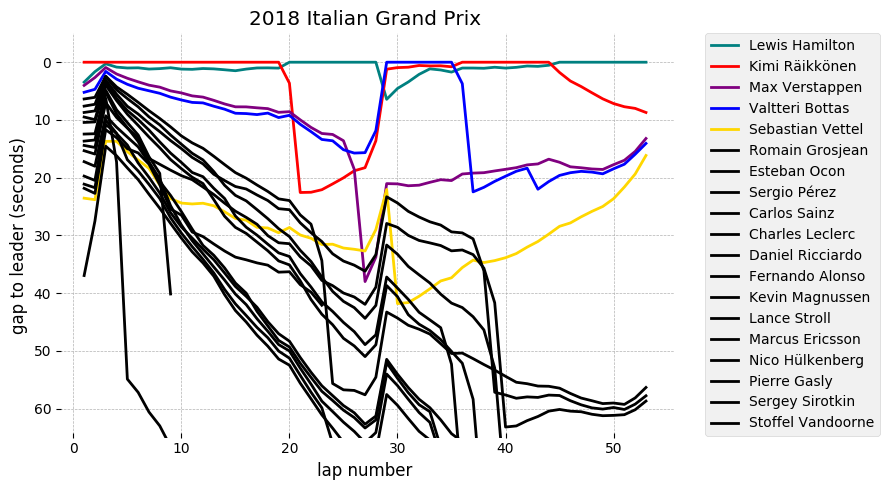

In [6]:
color = dict()
color['Lewis Hamilton'] = 'teal'
color['Valtteri Bottas'] = 'blue'
color['Sebastian Vettel'] = 'gold'
color['Max Verstappen'] = 'purple'
color['Kimi Räikkönen'] = 'red'
axes = showgaps(2018, 'Italian Grand Prix', **color)
savepng(axes, 'finnish_line')

## over easy

Save /context/data/plots/over easy.png


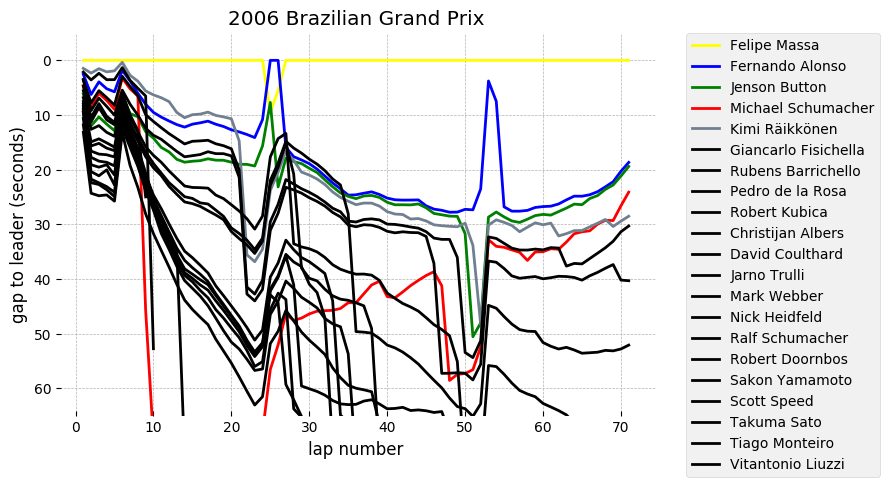

In [7]:
color = dict()
color['Felipe Massa'] = 'yellow'
color['Fernando Alonso'] = 'blue'
color['Jenson Button'] = 'green'
color['Michael Schumacher'] = 'red'
color['Kimi Räikkönen'] = 'slategrey'
axes = showgaps(2006, 'Brazilian Grand Prix', **color)
savepng(axes, 'over easy')